# Marriages, divorces (time series)

https://www.destatis.de/EN/Themes/Society-Environment/Population/Marriages-Divorces-Life-Partnerships/Tables/lrbev06.html

# Import Libraries

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
import requests
from bs4 import BeautifulSoup

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 10
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
url = 'https://www.destatis.de/EN/Themes/Society-Environment/Population/Marriages-Divorces-Life-Partnerships/Tables/lrbev06.html'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: text/html;charset=utf-8 -- Encoding: utf-8


# Parse HTML Document

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

# Navigate The Data Structure

In [5]:
tbody = soup.find('tbody')
trs = tbody.find_all('tr')

yr = []
tot_marr = []
marr_per1000 = []
tot_div = []
div_per1000 = []

for td in trs:
  yr.append(td.findAll('td')[0].string)
  tot_marr.append(td.findAll('td')[1].string)
  marr_per1000.append(td.findAll('td')[2].string)
  tot_div.append(td.findAll('td')[3].string)
  div_per1000.append(td.findAll('td')[4].string)

# Create Dataframe

In [6]:
data = {
    'Year': yr,
    'TotalMarriages': tot_marr,
    'MarriagesPer1000Residents': marr_per1000,
    'TotalDivorces': tot_div,
    'DivorcesPer1000Residents': div_per1000
}

df = pd.DataFrame(data=data)

# Head and Tail

In [7]:
df

,Year,TotalMarriages,MarriagesPer1000Residents,TotalDivorces,DivorcesPer1000Residents
0,None,"373,304",4.5,"143,801",1.7
1,None,"416,324",5.0,"149,010",1.8
2,2018,"449,466",5.4,"148,066",1.8
3,2017,"407,466",4.9,"153,501",1.9
4,2016,"410,426",5.0,"162,397",2.0
...,...,...,...,...,...
66,1954,"605,392",8.5,"78,884",1.1
67,1953,"620,121",8.8,"84,846",1.2
68,1952,"659,779",9.4,"90,255",1.3
69,1951,"718,166",10.3,"102,119",1.5


In [8]:
df.loc[df['Year'].isnull()]                             

,Year,TotalMarriages,MarriagesPer1000Residents,TotalDivorces,DivorcesPer1000Residents
0,None,"373,304",4.5,"143,801",1.7
1,None,"416,324",5.0,"149,010",1.8


In [9]:
# set index location 0 & 1 for year column to 2020 and 2019 respectively
df['Year'].iat[0] = 2020
df['Year'].iat[1] = 2019

In [10]:
df.iloc[[0, 1]]

,Year,TotalMarriages,MarriagesPer1000Residents,TotalDivorces,DivorcesPer1000Residents
0,2020,"373,304",4.5,"143,801",1.7
1,2019,"416,324",5.0,"149,010",1.8


In [11]:
df['Year'].isnull().sum()    

0

In [12]:
df.shape

(71, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       71 non-null     object
 1   TotalMarriages             71 non-null     object
 2   MarriagesPer1000Residents  71 non-null     object
 3   TotalDivorces              71 non-null     object
 4   DivorcesPer1000Residents   71 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB


In [14]:
df[['TotalMarriages', 'TotalDivorces']] = df[['TotalMarriages', 'TotalDivorces']].applymap(lambda x: str.strip(x).replace(',', ''))
df[['TotalMarriages', 'TotalDivorces']] = df[['TotalMarriages', 'TotalDivorces']].applymap(lambda x: pd.to_numeric(x))
df.head()

,Year,TotalMarriages,MarriagesPer1000Residents,TotalDivorces,DivorcesPer1000Residents
0,2020,373304,4.5,143801,1.7
1,2019,416324,5.0,149010,1.8
2,2018,449466,5.4,148066,1.8
3,2017,407466,4.9,153501,1.9
4,2016,410426,5.0,162397,2.0


In [15]:
df = df.astype({'Year': np.int64})
df['Year'].dtype

dtype('int64')

In [16]:
df = df.astype(
  {
    'MarriagesPer1000Residents': np.float64,
    'DivorcesPer1000Residents': np.float64
  }
)

df.dtypes

Year                           int64
TotalMarriages                 int64
MarriagesPer1000Residents    float64
TotalDivorces                  int64
DivorcesPer1000Residents     float64
dtype: object

In [17]:
df.drop('Year', axis=1).describe()

,TotalMarriages,MarriagesPer1000Residents,TotalDivorces,DivorcesPer1000Residents
count,71.000000,71.000000,71.000000,71.000000
mean,504913.577465,6.512676,141940.380282,1.788732
std,105032.580313,1.696629,44621.256344,0.510336
min,368922.000000,4.500000,69450.000000,1.000000
25%,413375.000000,5.000000,97592.500000,1.300000
50%,496175.000000,6.400000,153061.000000,1.900000
75%,587740.000000,7.600000,179255.500000,2.300000
max,750452.000000,10.800000,213975.000000,2.600000


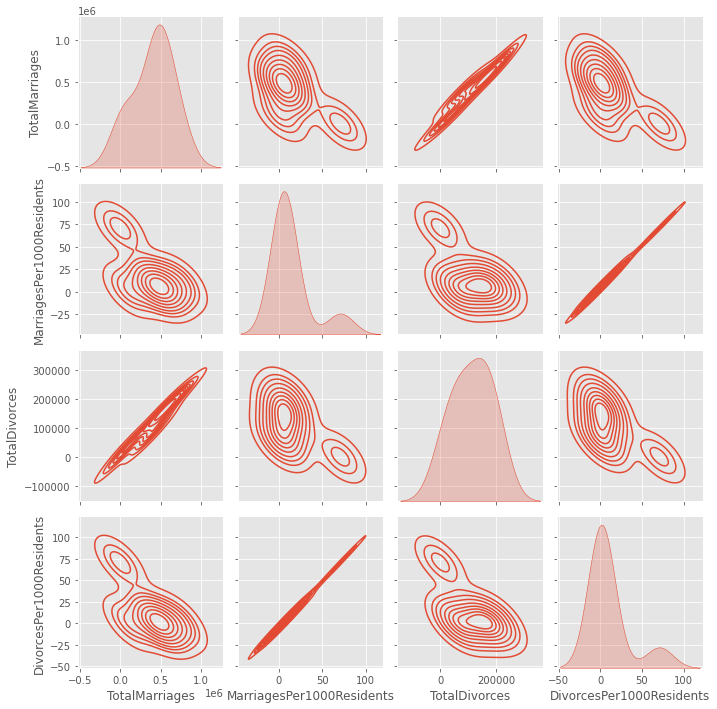

In [18]:
sns.pairplot(df.drop('Year', axis=1).describe(), kind='kde')

In [19]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)

# Data Visualization

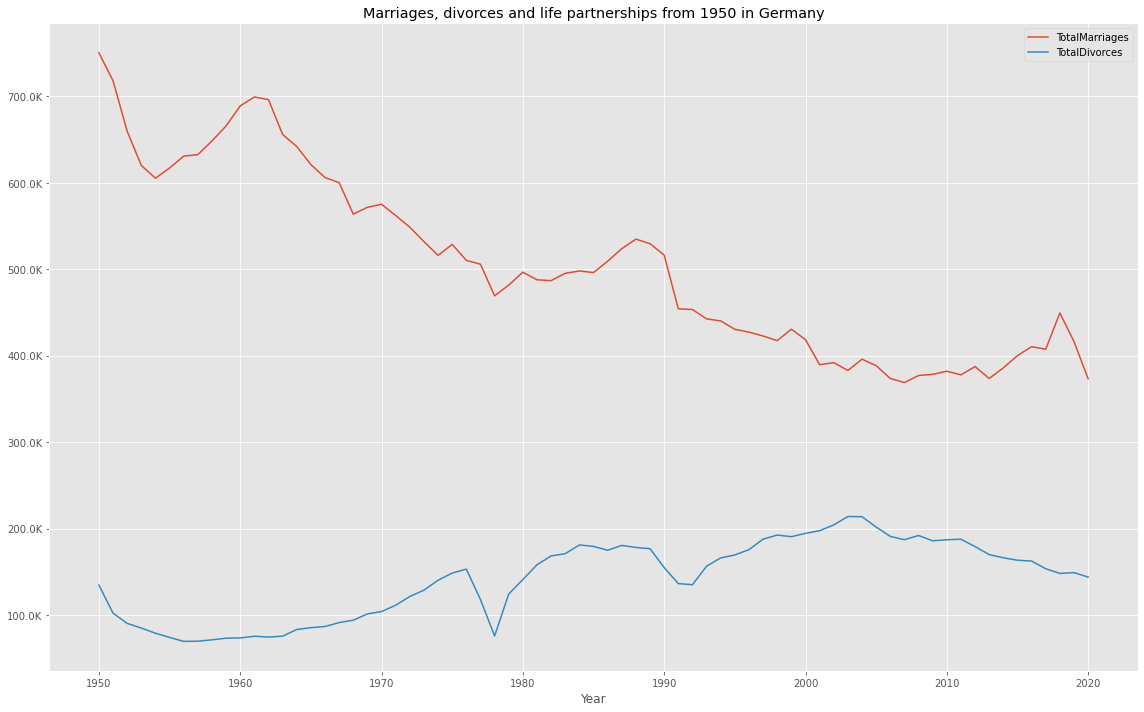

In [20]:
ax1 = df.set_index('Year').sort_index(ascending=True)[['TotalMarriages', 'TotalDivorces']].plot(figsize=(16, 10))
ax1.set(title='Marriages, divorces and life partnerships from 1950 in Germany')
ax1.yaxis.set_major_formatter(formatter=format_tsd)

[Text(0.5, 1.0, 'Marriages, divorces and life partnerships from 1950 in Germany')]

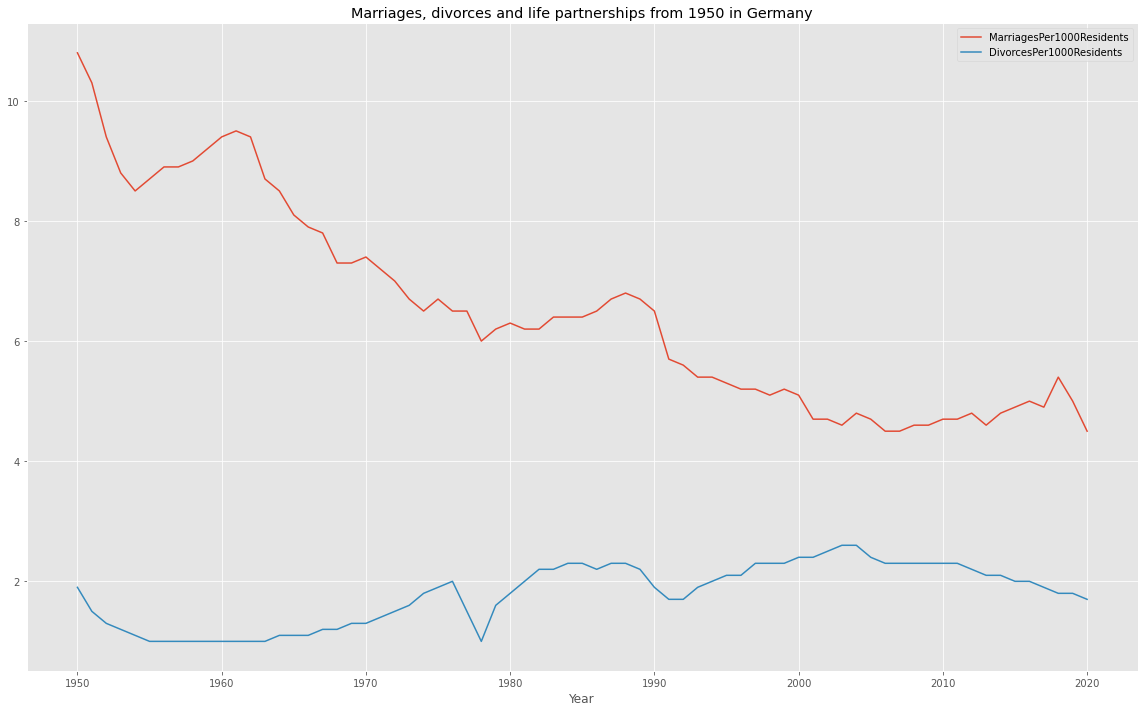

In [21]:
ax2 = df.set_index('Year').sort_index(ascending=True)[['MarriagesPer1000Residents', 'DivorcesPer1000Residents']].plot(figsize=(16, 10))
ax2.set(title='Marriages, divorces and life partnerships from 1950 in Germany')